In [63]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [64]:
import tensorflow as tf
from tensorflow.keras import models, layers

In [65]:
image_size = 256
batch_size = 32
epochs = 20

In [66]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'Potato Disease dataset',
    shuffle=True,
    image_size=(image_size, image_size),
    batch_size=batch_size
)

Found 2152 files belonging to 3 classes.


In [67]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [68]:
len(dataset)

68

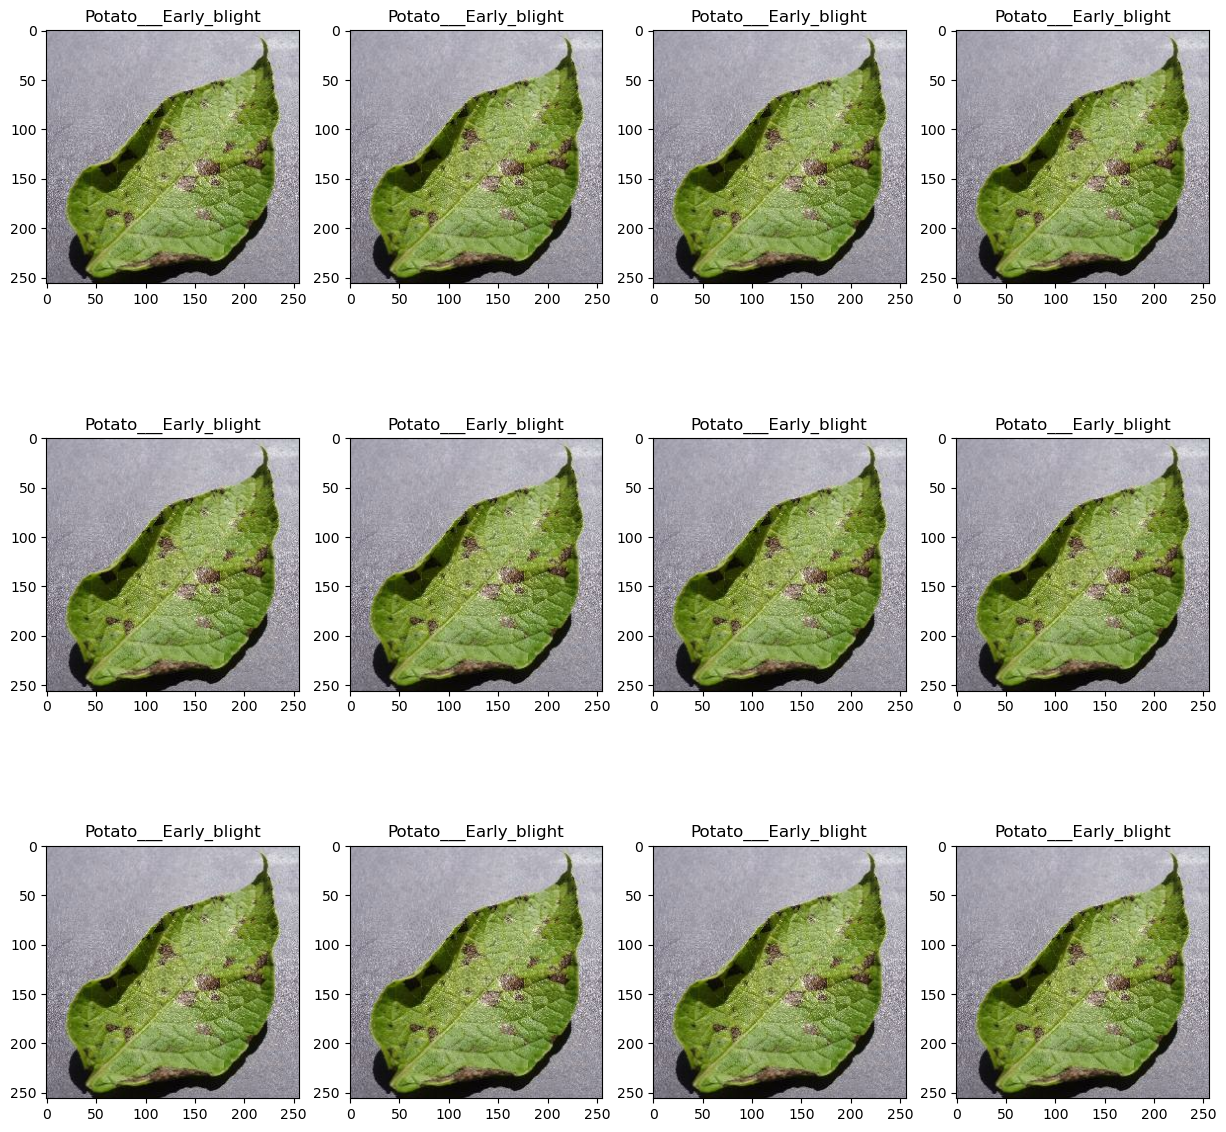

In [69]:
fig = plt.figure(figsize=(15, 15))

for images_batch, label_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
#         print(images_batch.shape)
#         print(label_batch.numpy())
        plt.imshow(images_batch[0].numpy().astype('uint8'))
        plt.title(class_names[label_batch[0]])

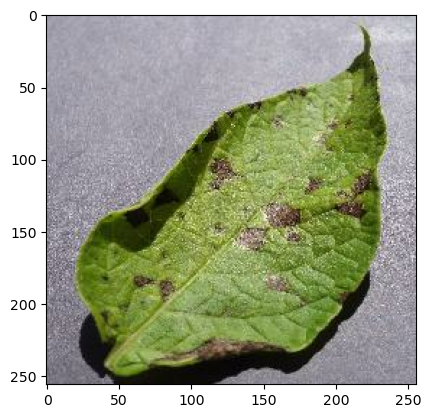

In [70]:
plt.imshow(images_batch[0].numpy().astype('uint8'))

In [71]:
CHANNELS = 3
EPOCHS = 20

In [72]:
train_size = 0.8
val_size = 0.1
test_size = 0.1

In [73]:
train_Ds = dataset.take(round(train_size * len(dataset)))
len(train_Ds)

54

In [74]:
test_Ds = dataset.skip(54)
len(test_Ds)

14

In [75]:
val_Ds = test_Ds.take(14)
test_Ds = test_Ds.skip(14)

In [76]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_size=0.1, shuffle=True, shuffle_size=10000):
    dataset_size = len(ds)
    if shuffle:
        ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [77]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [78]:
len(train_ds)

54

In [79]:
len(test_ds)

8

In [80]:
len(val_ds)

6

In [81]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [82]:
for i, y in train_ds.take(2):
    print(i)

tf.Tensor(
[[[[147. 137. 148.]
   [179. 169. 180.]
   [153. 143. 154.]
   ...
   [174. 162. 172.]
   [145. 133. 143.]
   [198. 186. 196.]]

  [[140. 130. 141.]
   [161. 151. 162.]
   [164. 154. 165.]
   ...
   [157. 145. 155.]
   [176. 164. 174.]
   [201. 189. 199.]]

  [[175. 165. 176.]
   [206. 196. 207.]
   [119. 109. 120.]
   ...
   [177. 165. 175.]
   [164. 152. 162.]
   [220. 208. 218.]]

  ...

  [[148. 129. 135.]
   [149. 130. 136.]
   [151. 132. 138.]
   ...
   [156. 136. 138.]
   [159. 139. 141.]
   [162. 142. 144.]]

  [[131. 112. 118.]
   [139. 120. 126.]
   [147. 128. 134.]
   ...
   [160. 140. 142.]
   [161. 141. 143.]
   [166. 146. 148.]]

  [[130. 111. 117.]
   [142. 123. 129.]
   [153. 134. 140.]
   ...
   [144. 124. 126.]
   [162. 142. 144.]
   [163. 143. 145.]]]


 [[[170. 156. 156.]
   [170. 156. 156.]
   [169. 155. 155.]
   ...
   [129. 101. 100.]
   [129. 101. 100.]
   [119.  91.  90.]]

  [[164. 150. 150.]
   [166. 152. 152.]
   [167. 153. 153.]
   ...
   [138. 1

In [83]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(image_size, image_size),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [84]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [85]:
n_classes = len(class_names)

model = models.Sequential([
    resize_and_rescale, 
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(batch_size, image_size, image_size, 3)), 
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'), 
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(n_classes, activation='softmax')
    
])

In [86]:
model.build(input_shape=(batch_size, image_size, image_size, 3))

In [87]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_10 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                

In [88]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [ ]:
history = model.fit(train_ds, epochs=epochs, batch_size=batch_size, verbose=True, validation_data=val_ds)

Epoch 1/20
54/54 [==============================] - 636s 11s/step - loss: 0.8649 - accuracy: 0.5451 - val_loss: 0.6858 - val_accuracy: 0.7344
Epoch 2/20
54/54 [==============================] - 318s 6s/step - loss: 0.4468 - accuracy: 0.8119 - val_loss: 0.3051 - val_accuracy: 0.8698
Epoch 3/20
31/54 [================>.............] - ETA: 2:06 - loss: 0.3380 - accuracy: 0.8669

In [ ]:
loss, accuracy = model.evaluate(test_ds)

In [ ]:
print(f'Loss is {loss}')
print(f'Accuracy is {accuracy * 100}%')

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(epochs), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(3), history.history['loss'], label='Training Loss')
plt.plot(range(3), history.history['val_loss'], label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

In [ ]:
import numpy as np

for image_batch, label_batch in test_ds.take(1):
    
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = class_names[label_batch[0].numpy()]
    
    print('First image to predict: ', plt.imshow(first_image))
    print('Label of the first image:', first_label)
    
    batch_prediction = model.predict(image_batch)
    print('first prediction is,', class_names[np.argmax(batch_prediction[0])])

In [ ]:
def predict(model, img):
    # Resize the image if necessary (e.g., 224x224)
    img = tf.image.resize(img, [256, 256])  # Replace 224 with your model's input size
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Add batch dimension
    
    # Ensure data type consistency
    img_array = tf.cast(img_array, tf.float32)  # Cast to float32 if needed

    # Make the prediction
    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

In [ ]:
plt.figure(figsize=(15, 15))

for images, label_batch in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[label_batch[i]]
        
        # Convert Tensor to NumPy array before using astype
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(f"Predicted: {predicted_class} ({confidence}%)\nActual: {actual_class}")
        plt.axis('off')

plt.show()


In [ ]:
# Save the entire model to a folder named 'saved_model'
# model.save("saved_model_tomato")